<a href="https://colab.research.google.com/github/premkumarkora/Statlog_Shuttle_classification/blob/main/Statlog_Shuttle_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import csv

In [49]:
from google.colab import drive
drive.mount('/content/drive')
location = "/content/drive/My Drive/Colab Notebooks/data/shuttledata.csv"
df = pd.read_csv(location, header=None, 
 names=['time', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'target'])
df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,time,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1


In [50]:
df.shape

(43500, 10)

In [51]:
df.info() # All Data seems to be not null and seems to be int64 type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43500 entries, 0 to 43499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   time      43500 non-null  int64
 1   feature1  43500 non-null  int64
 2   feature2  43500 non-null  int64
 3   feature3  43500 non-null  int64
 4   feature4  43500 non-null  int64
 5   feature5  43500 non-null  int64
 6   feature6  43500 non-null  int64
 7   feature7  43500 non-null  int64
 8   feature8  43500 non-null  int64
 9   target    43500 non-null  int64
dtypes: int64(10)
memory usage: 3.3 MB


In [52]:
linear_vars = df.select_dtypes(include=[np.number]).columns # This will list columns that are numeric

In [53]:
def findupperloweroutliers(linear_vars):
  for i in linear_vars:
    iqr = df[i].quantile(0.75)- df[i].quantile(0.25)
    upper_threshold  = df[i].quantile(0.75)+(1.5*iqr)
    quantile75th     = df[i].quantile(0.75)
    lower_threshold  = df[i].quantile(0.25)-(1.5*iqr)
    quantile25th     = df[i].quantile(0.25)
    display(i + ": " + "Upper Threshold : " + str(upper_threshold) + " Top 5 values --> " + str(list(df[linear_vars].sort_values(by=i,ascending=False)[i].head())))
    # print(i,':',  "25th Quantile :", quantile25th ," || Lower Threshold :",lower_threshold, " || 75th Quantile :", quantile75th ,"|| Upper Threshold :", upper_threshold)
    display(i + ": " + "Lower Threshold : " + str(lower_threshold) + " Bottom 5 values --> " + str(list(df[linear_vars].sort_values(by=i,ascending=True)[i].head())))


In [54]:
findupperloweroutliers(linear_vars)

'time: Upper Threshold : 80.5 Top 5 values --> [126, 123, 123, 123, 123]'

'time: Lower Threshold : 12.5 Bottom 5 values --> [27, 27, 36, 36, 36]'

'feature1: Upper Threshold : 0.0 Top 5 values --> [5075, 4903, 4692, 4254, 3447]'

'feature1: Lower Threshold : 0.0 Bottom 5 values --> [-4821, -4624, -4475, -4184, -4048]'

'feature2: Upper Threshold : 104.0 Top 5 values --> [149, 141, 113, 113, 113]'

'feature2: Lower Threshold : 64.0 Bottom 5 values --> [21, 29, 29, 44, 64]'

'feature3: Upper Threshold : 0.0 Top 5 values --> [3830, 3743, 2674, 2565, 2006]'

'feature3: Lower Threshold : 0.0 Bottom 5 values --> [-3939, -2044, -1108, -674, -587]'

'feature4: Upper Threshold : 76.0 Top 5 values --> [436, 436, 336, 336, 72]'

'feature4: Lower Threshold : -4.0 Bottom 5 values --> [-188, -188, -188, -188, -160]'

'feature5: Upper Threshold : 20.0 Top 5 values --> [13148, 11749, 9931, 7973, 6339]'

'feature5: Lower Threshold : -20.0 Bottom 5 values --> [-13839, -12809, -11042, -10453, -8392]'

'feature6: Upper Threshold : 58.5 Top 5 values --> [105, 104, 75, 75, 73]'

'feature6: Lower Threshold : 14.5 Bottom 5 values --> [-48, -43, -43, -27, -26]'

'feature7: Upper Threshold : 94.5 Top 5 values --> [270, 269, 265, 265, 240]'

'feature7: Lower Threshold : 2.5 Bottom 5 values --> [-353, -353, -258, -258, 16]'

'feature8: Upper Threshold : 35.0 Top 5 values --> [266, 244, 242, 226, 196]'

'feature8: Lower Threshold : -21.0 Bottom 5 values --> [-356, -356, -298, -298, -14]'

'target: Upper Threshold : 1.0 Top 5 values --> [7, 7, 7, 7, 7]'

'target: Lower Threshold : 1.0 Bottom 5 values --> [1, 1, 1, 1, 1]'

In [55]:
X = df.drop(['target'], axis=1)
y = df[['target']]

In [56]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
def quicklazy_predictor(X,y,type):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  import lazypredict 
  if (type == 'classifier'):
    from lazypredict.Supervised import LazyClassifier
    clf = LazyClassifier(verbose=0,ignore_warnings=True)
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    print(models)
    #models
  elif (type == 'regressor'):
    from lazypredict.Supervised import LazyRegressor
    clf = LazyRegressor(verbose=0,ignore_warnings=True)  
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    print(models)
  else:
    print("Please check your Type: It shoul;d be either -- regressor or -- classifier ")
#quicklazy_predictor(X,y,'classifier')

In [58]:
df.shape

(43500, 10)

In [59]:
def removeoutliers(df, listvars, z):
    from scipy import stats
    for var in listvars:
        df1 = df[np.abs(stats.zscore(df[var])) < z]
    return df1
#df = removeoutliers(df, linear_vars,3)

In [60]:
df.shape

(43500, 10)

In [61]:
findupperloweroutliers(linear_vars)

'time: Upper Threshold : 80.5 Top 5 values --> [126, 123, 123, 123, 123]'

'time: Lower Threshold : 12.5 Bottom 5 values --> [27, 27, 36, 36, 36]'

'feature1: Upper Threshold : 0.0 Top 5 values --> [5075, 4903, 4692, 4254, 3447]'

'feature1: Lower Threshold : 0.0 Bottom 5 values --> [-4821, -4624, -4475, -4184, -4048]'

'feature2: Upper Threshold : 104.0 Top 5 values --> [149, 141, 113, 113, 113]'

'feature2: Lower Threshold : 64.0 Bottom 5 values --> [21, 29, 29, 44, 64]'

'feature3: Upper Threshold : 0.0 Top 5 values --> [3830, 3743, 2674, 2565, 2006]'

'feature3: Lower Threshold : 0.0 Bottom 5 values --> [-3939, -2044, -1108, -674, -587]'

'feature4: Upper Threshold : 76.0 Top 5 values --> [436, 436, 336, 336, 72]'

'feature4: Lower Threshold : -4.0 Bottom 5 values --> [-188, -188, -188, -188, -160]'

'feature5: Upper Threshold : 20.0 Top 5 values --> [13148, 11749, 9931, 7973, 6339]'

'feature5: Lower Threshold : -20.0 Bottom 5 values --> [-13839, -12809, -11042, -10453, -8392]'

'feature6: Upper Threshold : 58.5 Top 5 values --> [105, 104, 75, 75, 73]'

'feature6: Lower Threshold : 14.5 Bottom 5 values --> [-48, -43, -43, -27, -26]'

'feature7: Upper Threshold : 94.5 Top 5 values --> [270, 269, 265, 265, 240]'

'feature7: Lower Threshold : 2.5 Bottom 5 values --> [-353, -353, -258, -258, 16]'

'feature8: Upper Threshold : 35.0 Top 5 values --> [266, 244, 242, 226, 196]'

'feature8: Lower Threshold : -21.0 Bottom 5 values --> [-356, -356, -298, -298, -14]'

'target: Upper Threshold : 1.0 Top 5 values --> [7, 7, 7, 7, 7]'

'target: Lower Threshold : 1.0 Bottom 5 values --> [1, 1, 1, 1, 1]'

In [62]:
df.describe()

,time,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,48.249747,-0.205126,85.341563,0.262736,34.528782,1.298276,37.074552,50.899862,13.964598,1.700529
std,12.252618,78.142770,8.908602,41.004131,21.703409,179.486760,13.135557,21.463250,25.648404,1.354648
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-13839.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,13148.000000,105.000000,270.000000,266.000000,7.000000


In [63]:
df.corr()

,time,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
time,1.000000,0.066365,0.262622,-0.007774,-0.051460,0.007306,-0.757307,0.168417,0.526896,0.737641
feature1,0.066365,1.000000,-0.013422,-0.001609,0.000373,-0.001826,-0.070628,-0.005827,0.031235,-0.003978
feature2,0.262622,-0.013422,1.000000,0.042157,0.255181,-0.002909,0.430019,0.155282,-0.091279,0.145267
feature3,-0.007774,-0.001609,0.042157,1.000000,-0.004767,0.008286,0.036169,0.022352,0.000410,-0.003180
feature4,-0.051460,0.000373,0.255181,-0.004767,1.000000,0.103159,0.221277,-0.914963,-0.875212,-0.430602
feature5,0.007306,-0.001826,-0.002909,0.008286,0.103159,1.000000,-0.008569,-0.105569,-0.083378,0.000707
feature6,-0.757307,-0.070628,0.430019,0.036169,0.221277,-0.008569,1.000000,-0.053010,-0.555205,-0.593932
feature7,0.168417,-0.005827,0.155282,0.022352,-0.914963,-0.105569,-0.053010,1.000000,0.859527,0.505146
feature8,0.526896,0.031235,-0.091279,0.000410,-0.875212,-0.083378,-0.555205,0.859527,1.000000,0.722647
target,0.737641,-0.003978,0.145267,-0.003180,-0.430602,0.000707,-0.593932,0.505146,0.722647,1.000000


I feel the target value has to be plotted to see if the data is imbalanced!

1    34108
4     6748
5     2458
3      132
2       37
7       11
6        6
Name: target, dtype: int64


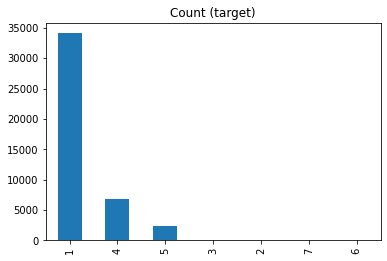

In [64]:
target_count = df.target.value_counts()
print(target_count)
target_count.plot(kind='bar', title='Count (target)')

In [67]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)
X_smt.shape

(238549, 9)

In [68]:
df_smt = pd.DataFrame(X_smt)
df_smt['target'] = y_smt

2    34108
3    34108
6    34108
7    34108
4    34068
5    34050
1    33999
Name: target, dtype: int64


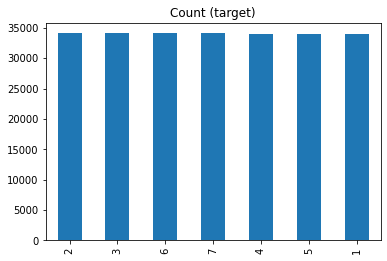

In [69]:
target_count = df_smt.target.value_counts()
print(target_count)
target_count.plot(kind='bar', title='Count (target)')

In [71]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_smt,y_smt,test_size=0.30)

In [74]:
X_train.shape


(166984, 10)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)


y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [83]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
print('Accuracy',logistic_regression.score(X_test,y_test)) # accuracy
#print(confusion_matrix(y_test,y_pred))
#f1_score(y_test,y_pred)
#logistic_regression.score(X_test,y_test)
#plot_roc_curve(logistic_regression, X_test, y_test)
#accuracy_score(y_test,y_pred)

Accuracy 0.9999580800670719


Approximately 80% of the data belongs to class 1. Therefore the default accuracy is about 80%. The aim here is to obtain an accuracy of 99 - 99.9%.